## Problem 2.24

In [251]:
# TODO: Add your imports
import numpy as np
import matplotlib.pyplot as plt

### 2.24 (B)

In [252]:
def target_function(x):
    # TODO: implement target function
    return x**2

In [253]:
def gD(x1,x2 , y1, y2):
    # y = ax + b
    a = (y2-y1)/(x2-x1)
    b = y1 - a*x1
    return a,b

In [254]:
def generate_data(N):
    # generate data set of size N for uniform distribution in [-1,1]
    data_set = np.random.uniform(-1,1,(N,2))
    return data_set

In [255]:
def run_numerical_experiment(training_set , test_set , y_train , y_test):
    # TODO: implement experiment    
    g_bar = (0 , 0)
    Eout = 0
    g_list = []
    for i in range(len(training_set)):
        x1 , x2 = training_set[i]
        y1 , y2 = y_train[i]
        slope , intercept = gD(x1,x2 , y1, y2)
        g_list.append((slope , intercept))
        y_pred = slope * test_set + intercept
        g_bar = (g_bar[0] + slope , g_bar[1] + intercept)
        error = np.mean((y_pred - y_test)**2)
        Eout += error

    Eout /= len(training_set)
    g_bar = (g_bar[0] / len(training_set) , g_bar[1] / len(training_set))
    return Eout , g_bar , g_list
    

### 2.24 (C)

In [256]:
# TODO: Run experiment and calculate bias and variance (+ plotting)

training_set_size = 100000
test_set_size = 1000

training_set = generate_data(training_set_size)
test_set = generate_data(test_set_size)

y_train = target_function(training_set)
y_test = target_function(test_set)

Eout , g_bar , g_list = run_numerical_experiment(training_set , test_set , y_train , y_test)
# bias equation => bias = E[(g_bar(x) - f(x))**2]
bias = np.mean((g_bar[0] * test_set + g_bar[1] - y_test)**2)
# variance equation => variance = E[(g_bar(x) - g(x))**2]
variance = np.mean([(g[0] * test_set + g[1] - g_bar[0] * test_set + g_bar[1])**2 for g in g_list])

print("bias: " , bias)
print("variance: " , variance)
print("bias + variance: " , bias + variance)
print("Eout: " , Eout)

bias:  0.19571063022049828
variance:  0.32993924453923484
bias + variance:  0.5256498747597331
Eout:  0.5256454346131223


Eout almost have the same value as bias + variance.

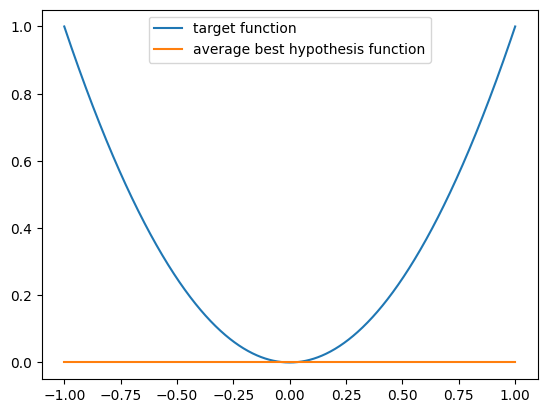

In [257]:
# plot the target function and the hypothesis function
x = np.linspace(-1,1,1000)
y = target_function(x)
plt.plot(x,y)
y = g_bar[0] * x + g_bar[1]
plt.plot(x,y)
plt.legend(['target function' , 'average best hypothesis function'])
plt.show()

### 2.24 (E)

In [258]:
# TODO: Run experiment for quadratic hypothesis
def new_gD(y_list):
    return np.mean(y_list)

def new_run_numerical_experiment(training_set , test_set , y_train , y_test):
    Eout = 0
    g_bar = 0
    g_list = []
    for i in range(len(training_set)):
        y_pred = new_gD(y_train[i])
        g_list.append(y_pred)
        g_bar += y_pred
        error = np.mean((y_pred - y_test)**2)
        Eout += error

    Eout /= len(training_set)
    g_bar /= len(training_set)
    return Eout , g_bar , g_list

def new_generate_data(N, d):
    data_set = np.random.uniform(-1,1,(N,d))
    data_set = np.sort(data_set , axis=1)
    return data_set

def plot_(y, pred):
    x = np.linspace(-1,1,1000)
    plt.plot(x,y, label='target function')
    plt.plot(x,pred * np.ones(1000), label='average best hypothesis function')
    plt.legend()
    plt.show()

bias:  0.08924501474863822
variance:  0.044579471496668764
bias + variance:  0.133824486245307
Eout:  0.13382448624530752


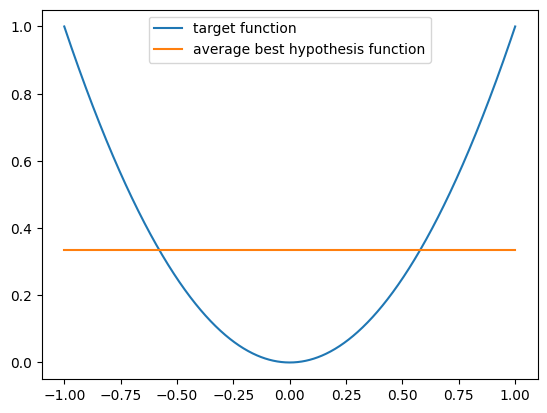

In [259]:
# d = 2
d  = 2
training_set_2 = new_generate_data(training_set_size , d)
test_set_2 = new_generate_data(test_set_size, d)

y_train_2 = target_function(training_set_2)
y_test_2 = target_function(np.linspace(-1,1,1000))

Eout_2 , g_bar_2 , g_list_2 = new_run_numerical_experiment(training_set_2 , test_set_2 , y_train_2 , y_test_2)
# bias equation => bias = E[(g_bar(x) - f(x))**2]
bias_2 = np.mean((g_bar_2 - y_test_2)**2)
# variance equation => variance = E[(g_bar(x) - g(x))**2]
variance_2 = np.mean([(g - g_bar_2)**2 for g in g_list_2])

print("bias: " , bias_2)
print("variance: " , variance_2)
print("bias + variance: " , bias_2 + variance_2)
print("Eout: " , Eout_2)

# plot the target function and the hypothesis function
plot_(y_test_2, g_bar_2)

bias:  0.08924511569827223
variance:  0.01771886258989679
bias + variance:  0.10696397828816902
Eout:  0.10696397828816984


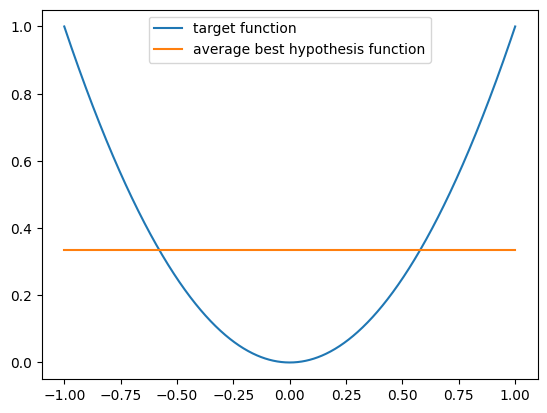

In [260]:
# d = 5
d  = 5
training_set_5 = new_generate_data(training_set_size , d)
test_set_5 = new_generate_data(test_set_size, d)

y_train_5 = target_function(training_set_5)
y_test_5 = target_function(np.linspace(-1,1,1000))

Eout_5 , g_bar_5 , g_list_5 = new_run_numerical_experiment(training_set_5 , test_set_5 , y_train_5 , y_test_5)
# bias equation => bias = E[(g_bar(x) - f(x))**2]
bias_5 = np.mean((g_bar_5 - y_test_5)**2)
# variance equation => variance = E[(g_bar(x) - g(x))**2]
variance_5 = np.mean([(g - g_bar_5)**2 for g in g_list_5])

print("bias: " , bias_5)
print("variance: " , variance_5)
print("bias + variance: " , bias_5 + variance_5)
print("Eout: " , Eout_5)

# plot the target function and the hypothesis function
plot_(y_test_5, g_bar_5)


bias:  0.0892458550420294
variance:  0.0088648177961674
bias + variance:  0.0981106728381968
Eout:  0.09811067283819531


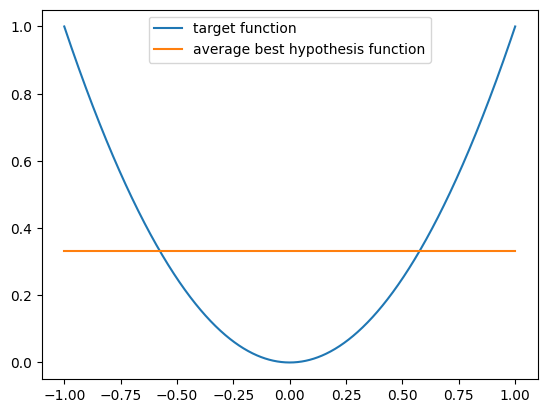

In [261]:
# d = 10
d  = 10
training_set_10 = new_generate_data(training_set_size , d)
test_set_10 = new_generate_data(test_set_size, d)

y_train_10 = target_function(training_set_10)
y_test_10 = target_function(np.linspace(-1,1,1000))

Eout_10 , g_bar_10 , g_list_10 = new_run_numerical_experiment(training_set_10 , test_set_10 , y_train_10 , y_test_10)
# bias equation => bias = E[(g_bar(x) - f(x))**2]
bias_10 = np.mean((g_bar_10 - y_test_10)**2)
# variance equation => variance = E[(g_bar(x) - g(x))**2]
variance_10 = np.mean([(g - g_bar_10)**2 for g in g_list_10])

print("bias: " , bias_10)
print("variance: " , variance_10)
print("bias + variance: " , bias_10 + variance_10)
print("Eout: " , Eout_10)

# plot the target function and the hypothesis function
plot_(y_test_10, g_bar_10)

bias:  0.08924547747225575
variance:  0.004462119936807488
bias + variance:  0.09370759740906325
Eout:  0.09370759740906419


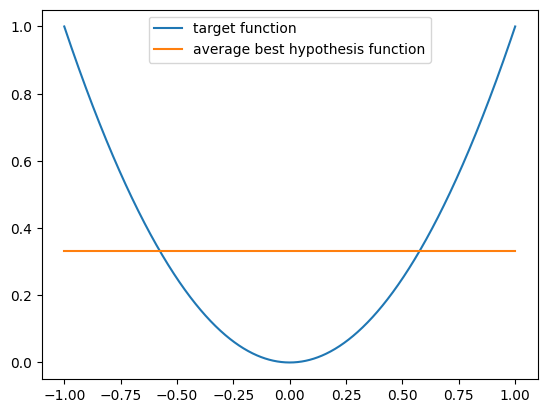

In [262]:
# d = 20
d  = 20
training_set_20 = new_generate_data(training_set_size , d)
test_set_20 = new_generate_data(test_set_size, d)

y_train_20 = target_function(training_set_20)
y_test_20 = target_function(np.linspace(-1,1,1000))

Eout_20 , g_bar_20 , g_list_20 = new_run_numerical_experiment(training_set_20 , test_set_20 , y_train_20 , y_test_20)
# bias equation => bias = E[(g_bar(x) - f(x))**2]
bias_20 = np.mean((g_bar_20 - y_test_20)**2)
# variance equation => variance = E[(g_bar(x) - g(x))**2]
variance_20 = np.mean([(g - g_bar_20)**2 for g in g_list_20])

print("bias: " , bias_20)
print("variance: " , variance_20)
print("bias + variance: " , bias_20 + variance_20)
print("Eout: " , Eout_20)

# plot the target function and the hypothesis function
plot_(y_test_20, g_bar_20)


In [263]:
'''
Eout approximatatly equals to bias + variance

The bias almost always remains the same and don't change with the increase of n.

The variance decreases with the increase of n. 

The varinace is smaller than the bias due to the fact that the hypothesis function is not complex.
'''

"\nEout approximatatly equals to bias + variance\n\nThe bias almost always remains the same and don't change with the increase of n.\n\nThe variance decreases with the increase of n. \n\nThe varinace is larger than the bias due to the fact that the hypothesis function is not complex.\n"